**BARCELONA-PARIS SAINT-GERMAIN LABDARÚGÓ MÉRKŐZÉS ELEMZÉSE**

**Kiegészítő csomagok importálása**

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

**Adatok beolvasása**

In [2]:
data=pd.read_excel('statistics.xlsx')
print(data)

                  Team  Goals  1st_leg_goals  Shots  Shots_on_target  Saves  \
0            Barcelona      6              0     17                7      2   
1  Paris Saint-Germain      1              4      7                3      2   

   Ball_pos (%)  Corners  Fouls_com  Offsides  Yellow_cards  Red_cards  Subs  \
0            65        6         16         3             5          0     3   
1            35        4         25         5             5          0     3   

   Penalties  
0          2  
1          0  


**Kaput eltaláló lövések száma**

In [3]:
lovesek=data['Shots_on_target'].sum()
print(lovesek)

10


**Több gólt szerző csapat**

In [4]:
gyoztes=data.loc[data['Goals'].idxmax()]['Team']
print(gyoztes)

Barcelona


**Kieső csapat**

In [5]:
def goals(x):
    return x['Goals'] + x['1st_leg_goals']

data['Goals_scored'] = data.apply(goals, axis=1)
kieso=data.loc[data['Goals_scored'].idxmin()]['Team']
print(kieso)

Paris Saint-Germain


**Labdabirtoklás grafikonon ábrázolva**

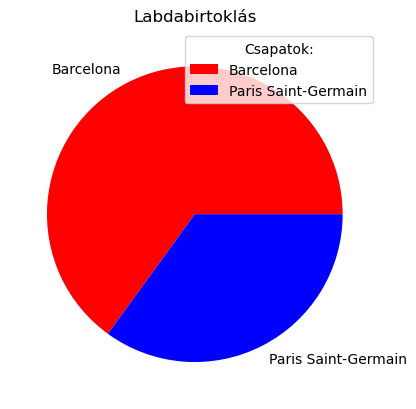

In [6]:
ballpos=np.array(data['Ball_pos (%)'])
csapatok=np.array(data['Team'])
szinek=['red','blue']
plt.pie(ballpos,labels=csapatok,colors=szinek)
plt.title('Labdabirtoklás')
plt.legend(title='Csapatok:')
plt.show()

**Kapura lövések ábrázolva hisztogram segítségével**

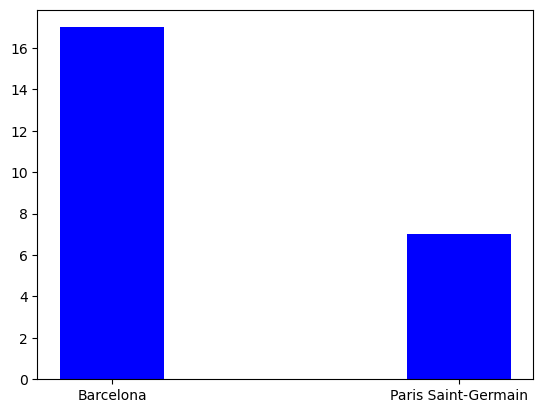

In [7]:
teams=np.array(data['Team'])
shots=np.array(data['Shots'])
plt.bar(teams,shots,width=0.3,color='blue')
plt.show()

**Szögletek száma csapatonként**

In [8]:
szogletek=data[['Team','Corners']]
print(szogletek.to_string(index=False))

               Team  Corners
          Barcelona        6
Paris Saint-Germain        4


**Tizenegyest kiharcoló csapat(ok)**

In [9]:
tizi=data.loc[data['Penalties']>0,['Team']]
print(tizi.to_string(index=False))

     Team
Barcelona


**Mely csapatnak/csapatoknak volt kettőnél több leshelyzete?**

In [10]:
lesek=data.loc[data['Offsides']>=2,['Team','Offsides']]
print(lesek.to_string(index=False))

               Team  Offsides
          Barcelona         3
Paris Saint-Germain         5


**Melyik csapat szabálytalankodott többet és kapott több sárga lapot?**

In [11]:
def fouls(x):
    return x['Fouls_com'] + x['Yellow_cards']

data['Fouls_Yellows']=data.apply(fouls,axis=1)
team=data.loc[data['Fouls_Yellows'].idxmax()]['Team']
print(team)

Paris Saint-Germain


**Volt piros lap a mérkőzésen?**

In [12]:
redcard=data['Red_cards'].sum()
if redcard>=1:
    print('Igen, volt',redcard)
else:
    print('Nem volt')

Nem volt
